<a href="https://colab.research.google.com/github/vvrgit/NNDL-2020/blob/main/LAB01_Artificial_Neural_Networks_Dr_Venkataramana_Veeramsetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

#ANN Without Hidden Layers and Bias and with linear activation functions

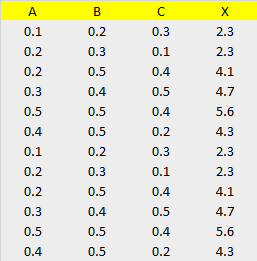

#Data Import

In [106]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-00.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,2.3
1,0.2,0.3,0.1,2.3
2,0.2,0.5,0.4,4.1
3,0.3,0.4,0.5,4.7
4,0.5,0.5,0.4,5.6


#Split Data

In [102]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

#Random Weight Initialization

In [107]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,1))
print(weights)

[[-1.3511732 ]
 [ 2.03658672]
 [-5.74080773]]


#Neural Nets Training With SGD

In [115]:
l=0.001
for i in range(100):
    for j in range(q1):
        o=np.dot(data_train[j,0:3],weights) #n.shape-1,1
        dw=(l*(data_train[[j],3]-o))*data_train[[j],0:3].T
        weights=weights+dw

print(weights)
print(weights.shape)

[[2.5048271 ]
 [7.56588925]
 [5.22683586]]
(3, 1)


# Prediction with testing data

In [110]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(data_test[j,0:3],weights) #n.shape-1,
    pred_test[j]=n2
pred_test 

array([[6.37474083]])

#Prediction with training data

In [111]:
pred_train=np.zeros((q1,1))
for j in range(q1):
    n2=np.dot(data_train[j,0:3],weights) #n.shape-1, 
    pred_train[j]=n2
pred_train

array([[6.39072146],
       [7.12602217],
       [7.12602217],
       [3.29381776],
       [3.33135018],
       [3.33135018],
       [3.29381776],
       [5.83078301],
       [6.39072146],
       [6.37474083],
       [5.83078301]])

#Error Calculation

In [112]:
from sklearn.metrics import mean_squared_error
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))

Training MSE: 0.3732769517130052
Testing MSE: 0.0754825213846656


#Deployment

In [114]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
Pred=np.dot(inputvector[0,0:3],weights)
print("Predicted Output:",Pred)

enter value0.2
enter value0.3
enter value0.1
Predicted Output: [3.29381776]


# ANN Without Hidden Layer and with linear activation functions and bias

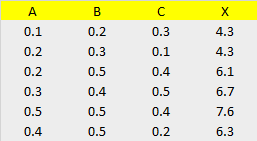

#Data Import

In [3]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-01.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,4.3
1,0.2,0.3,0.1,4.3
2,0.2,0.5,0.4,6.1
3,0.3,0.4,0.5,6.7
4,0.5,0.5,0.4,7.6


#Split Data

In [4]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

#Random initilization of Weigthts and Bias Parameters

In [13]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,1))
bias=np.random.uniform(-10,10,size=(1,1))
print(weights)
print(bias)

[[-8.84271316]
 [ 0.71066233]
 [-0.48567582]]
[[-9.37996592]]


##Learning with SGD

In [22]:
l=0.001
for i in range(10000):
    for j in range(q1):
        o=np.dot(data_train[j,0:3],weights)+bias #n.shape-1,1
        dw=(l*(data_train[[j],3]-o))*data_train[[j],0:3].T
        db=(l*(data_train[[j],3]-o))
        weights=weights+dw
        bias=bias+db
print(bias)
print(weights.shape)
print(dw.shape)

[[1.80787923]]
(3, 1)
(3, 1)


#Prediction on Testing Data

In [23]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(data_test[j,0:3],weights)+bias #n.shape-1,
    pred_test[j]=n2
pred_test 

array([[7.39708568]])

#Testing Error

In [24]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))

Testing MSE: 1.6824312661585616


#Prediction on Training Data

In [26]:
pred_train=np.zeros((q1,1))
for j in range(q1):
    n2=np.dot(data_train[j,0:3],weights)+bias #n.shape-1, 
    pred_train[j]=n2
pred_train

array([[2.65259137],
       [5.22602146],
       [2.81555341],
       [5.07855719],
       [4.48410717]])

#Training Error

In [27]:
from sklearn.metrics import mean_squared_error
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 3.295970903954867


#Deployment

In [28]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
Pred=np.dot(inputvector[0,0:3],weights)+bias
print("Predicted Output:",Pred)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[4.62343264]]


#ANN With Hidden Layer and with linear activation functions and no bias

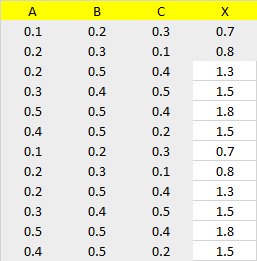

#Data Import

In [63]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData_03.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,0.734056
1,0.2,0.3,0.1,0.782396
2,0.2,0.5,0.4,1.349732
3,0.3,0.4,0.5,1.519960
4,0.5,0.5,0.4,1.849891


# Data Split

In [64]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# Random weight initialization

In [65]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)


(3, 5) [[-0.27577332  0.53999253  0.50265186  0.90369886  0.66750935]
 [-0.96722496  0.00233453  0.37918121 -0.78894453 -0.23294348]
 [ 0.63614768  0.79308551  0.59382628 -0.28449337 -0.45206324]]
(5, 1) [[ 0.48910975]
 [-0.14569288]
 [ 0.88064351]
 [ 0.22210074]
 [-0.72495381]]


#Forward pass

In [66]:
#Forward pass
def forward_pass(a,w_ij,w_jk,j):
    o_j=np.dot(a[[j],0:3],w_ij)
    o_k=np.dot(o_j,w_jk)
    return o_j,o_k 

#Backward pass

In [67]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j):
    dw_ij=np.zeros((3,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k),o_j)
    w_jk=w_jk+dw_jk.T
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*w_jk[[k]],a[[j],0:3])
    w_ij=w_ij+dw_ij
    return w_jk,w_ij

#Neural Nets Training With SGD

In [68]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,j)
        w_jk,w_ij=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,j)
print(w_jk)
print(w_ij)

[[ 0.32768537]
 [ 0.11914646]
 [ 1.2812513 ]
 [ 0.16505156]
 [-0.78853858]]
[[-1.89270366e-01  5.37764721e-01  7.31572791e-01  9.44251757e-01
   5.07267523e-01]
 [-8.59009100e-01 -6.89985676e-04  6.64810262e-01 -7.38231376e-01
  -4.33078886e-01]
 [ 7.14687870e-01  7.90234093e-01  7.99029400e-01 -2.47736434e-01
  -5.96395699e-01]]


# Output prediction with test data

In [75]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,z)
print(pred_test.shape)

(1, 1)


# Output prediction with train data

In [76]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,z)
print(pred_train.shape)

(11, 1)


# Testing and Training Errors

In [71]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 0.010639938312227908
Training MSE: 0.07360597996403402


# Deployment

In [73]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
_,p=forward_pass(inputvector,w_ij,w_jk,0)
print("Predicted Output:",p)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[0.76194676]]


#ANN With Hidden Layer and with linear activation functions and with bias

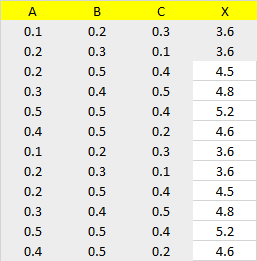

#Data Import

In [99]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData_02.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,3.567146
1,0.2,0.3,0.1,3.558730
2,0.2,0.5,0.4,4.475214
3,0.3,0.4,0.5,4.760498
4,0.5,0.5,0.4,5.193062


#Data Split

In [100]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# Random weight initialization

In [78]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
b_j=np.random.uniform(-1,1,size=(5,1))
b_k=np.random.uniform(-1,1,size=(1,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)
print(b_j)
print(b_k)

(3, 5) [[ 0.57469404 -0.35339448  0.48108828  0.2383597   0.8393884 ]
 [-0.26792804 -0.25929246 -0.10172232  0.01624492  0.03747365]
 [-0.36734369  0.77115243 -0.29927107  0.25341652 -0.32701799]]
(5, 1) [[-0.77069342]
 [-0.32600501]
 [-0.00863143]
 [-0.88824425]
 [-0.36196696]]
[[ 0.76816083]
 [-0.44741156]
 [-0.27318723]
 [-0.99641481]
 [ 0.31504705]]
[[-0.83403476]]


#Forward pass

In [91]:
#Forward pass
def forward_pass(a,w_ij,w_jk,b_j,b_k,j):
    o_j=np.dot(a[[j],0:3],w_ij)+b_j.T
    o_k=np.dot(o_j,w_jk)+b_k
    return o_j,o_k 

#Backward pass

In [92]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j):
    dw_ij=np.zeros((3,5))
    db_j=np.zeros((1,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k),o_j)
    w_jk=w_jk+dw_jk.T
    db_k=l*(a[[j],3]-o_k)
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*w_jk[[k]],a[[j],0:3])
        db_j[:,k]=l*(a[[j],3]-o_k)*w_jk[[k]]
    w_ij=w_ij+dw_ij
    b_j=b_j+db_j.T
    return w_jk,w_ij,b_j,b_k

#Neural Nets Training With SGD

In [93]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,b_j,b_k,j)
        w_jk,w_ij,b_j,b_k=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j)
print(w_jk)
print(w_ij)
print(b_j)
print(b_k)

[[-0.56505374]
 [-0.54323983]
 [-0.10959838]
 [-1.33287836]
 [-0.17359767]]
[[ 0.46434931 -0.4316567   0.46848462  0.03905307  0.79525367]
 [-0.39682092 -0.34821575 -0.11559245 -0.2109643  -0.01481367]
 [-0.47187592  0.6985459  -0.31069008  0.06804356 -0.36927689]]
[[ 0.50718668]
 [-0.61694447]
 [-0.29766937]
 [-1.43283659]
 [ 0.20610671]]
[[-0.83403476]]


#Output prediction with test data

In [95]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,b_j,b_k,z)
print(pred_test.shape)

(1, 1)


#Output prediction with train data

In [96]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,b_j,b_k,z)
print(pred_train.shape)

(11, 1)


# Error Calculations

In [97]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 0.0009196295547200012
Training MSE: 0.1519056609445115


#Deployment

In [98]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
_,p=forward_pass(inputvector,w_ij,w_jk,b_j,b_k,0)
print("Predicted Output:",p)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[1.20458355]]


#ANN With Hidden Layer and with Non-linear activation functions and with bias

# ***Data Processing***

---



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/PROJECT_Final.csv")
data.head()
min_load=data.min()
print(min_load)
max_load=data.max()
print(max_load)


Load    3377.9196
dtype: float64
Load    8841.66948
dtype: float64


In [ ]:
data.head()

,Load
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data=ms.fit_transform(data)
print(data)
print(data.shape)

[[0.39787738]
 [0.29380046]
 [0.27645431]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]
(2184, 1)


In [ ]:
a=np.zeros((len(data)-72,7))
print(a.shape)

(2112, 7)


In [ ]:
k=72
for i in range(2112):
    a[i,0],a[i,1],a[i,2],a[i,3],a[i,4],a[i,5],a[i,6]=data[k-1],data[k-2],data[k-3],data[k-24],data[k-48],data[k-72],data[k]
    k=k+1
print(a)

[[0.44580754 0.55202419 0.4649796  ... 0.28430002 0.39787738 0.41017375]
 [0.41017375 0.44580754 0.55202419 ... 0.25579869 0.29380046 0.36723631]
 [0.36723631 0.41017375 0.44580754 ... 0.24450087 0.27645431 0.30646772]
 ...
 [0.21779692 0.22852415 0.3052124  ... 0.63393341 0.66531625 0.24629825]
 [0.24629825 0.21779692 0.22852415 ... 0.48380931 0.47074263 0.32438447]
 [0.32438447 0.24629825 0.21779692 ... 0.39228553 0.4173918  0.65165045]]


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
a,a_test=train_test_split(a,test_size=0.05,random_state=1)
print(a.shape)
print(a_test.shape)
q1=len(a)
print(q1)
q2=len(a_test)
print(q2)

(1905, 7)
(101, 7)
1905
101


# ***Delta Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)
print(weights)

(6, 1)
[[-0.29832084]
 [ 0.36027509]
 [-0.29548685]
 [ 0.06927126]
 [-0.89495933]
 [ 0.67729431]]


In [ ]:
#Delta Learning

l=0.001
for i in range(100):
    for j in range(q1):
        n=np.dot(a[j,0:6],weights) #n.shape-1,1
        o=1/(1+np.exp(-n))
        dw=(l*(a[[j],6]-o))*o*(1-o)*a[[j],0:6].T
        #dw3=dw3.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[-2.27875913e-05]
 [-2.17215535e-05]
 [-2.32834229e-05]
 [-2.13620757e-05]
 [-2.97540245e-05]
 [-2.54898733e-05]]
[[ 0.13647038]
 [ 0.3673168 ]
 [-0.67840376]
 [ 0.36185198]
 [-0.62537751]
 [ 0.66645002]]


In [ ]:
#Delta Learning Testing
o2=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(a_test[j,0:6],weights) #n.shape-1,1
    o2[j]=1/(1+np.exp(-n2))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],o2))

0.03531187180751741


In [ ]:
# Prediction
c=10
n=np.dot(a[c,0:6],weights) #n.shape-1,1
o=1/(1+np.exp(-n))
Actual_load=a[c,6]*(max_load-min_load)+min_load
Estimated_Load=o*(max_load-min_load)+min_load
print('Actual Load=', Actual_load)
print('Estimated Load=', Estimated_Load)

Actual Load= Load    5260.01472
dtype: float64
Estimated Load= Load    6315.511975
dtype: float64


# ***Percepton Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)

(6, 1)


In [ ]:
#Percepton Learning

l=0.001
for i in range(10):
    for j in range(q1):
        n=np.dot(a[j,0:6],weights) #n.shape-1,1
        if(n>0):
            o=1
        else:
            o=0
        dw=(l*(a[j,6]-o))*a[j,0:6].T
        dw=dw.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[6.77113098e-05]
 [6.45436728e-05]
 [6.91846293e-05]
 [6.34755162e-05]
 [8.84114491e-05]
 [7.57409012e-05]]
[[ 0.50303686]
 [-0.14353898]
 [-0.16888725]
 [ 0.19314818]
 [-0.29764288]
 [-0.07387492]]


# ***Widrow-Hoff Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)
weights

(6, 1)


array([[-0.39159472],
       [-0.53759037],
       [ 0.93248705],
       [-0.78428862],
       [ 0.0069686 ],
       [-0.85695806]])

In [ ]:
#Widrow-Hoff

l=0.001

for i in range(100):
    for j in range(q1):
        o=np.dot(a[j,0:6],weights) #n.shape-1,1
        dw=(l*(a[j,6]-o))*a[j,0:6].T
        dw=dw.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[2.03853730e-05]
 [1.85947561e-05]
 [1.81064061e-05]
 [2.34523265e-05]
 [2.84798829e-05]
 [2.26715426e-05]]
[[ 0.5788431 ]
 [-0.13135506]
 [ 0.01930878]
 [ 0.24381316]
 [ 0.25767233]
 [ 0.02594959]]


In [ ]:
#Widro-off Testing
n3=np.zeros((q2,1))
j=0
for j in range(q2):
    n3[j]=np.dot(a_test[j,0:6],weights)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],n3))

0.007314848062021888


In [ ]:
# Prediction
c=100
n=np.dot(a[c,0:6],weights) #n.shape-1,1
o=1/(1+np.exp(-n))
print(o*(max_load-min_load)+min_load)
print(a[c,6]*(max_load-min_load)+min_load)

Load    6757.61198
dtype: float64
Load    5551.82208
dtype: float64


# ***Back Propagation Algorithm - Stochastic Gradient Descent Optimizer***

---



In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(6,9))
w_jk=np.random.uniform(-1,1,size=(9,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)

(6, 9) [[-0.53444658  0.7001869   0.39559511 -0.86787894 -0.41496841  0.31587241
  -0.1584089   0.15224916 -0.60655269]
 [-0.3972663  -0.62766084 -0.1027823   0.50184113 -0.16783769  0.73233816
  -0.87704902  0.24306043  0.37464562]
 [ 0.37902207  0.51502963 -0.58710852 -0.73912016  0.48572211 -0.15295383
  -0.62727593 -0.80706963 -0.91356434]
 [-0.1518878   0.9564104   0.58818479  0.55074359  0.98201553 -0.50828608
   0.93440124 -0.37047974  0.89181655]
 [-0.744913   -0.09967713 -0.48989651 -0.16186218  0.06344342  0.89987977
   0.11888784  0.59767627 -0.10745737]
 [-0.23382512 -0.52777018  0.34292008 -0.74034343 -0.31611801  0.9337254
   0.38984815 -0.61348553 -0.33289705]]
(9, 1) [[-0.67008657]
 [ 0.82740104]
 [ 0.05782183]
 [-0.35281535]
 [ 0.90728878]
 [ 0.74531268]
 [-0.5977362 ]
 [-0.88103912]
 [-0.8291426 ]]


In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,j):
    net_j=np.dot(a[[j],0:6],w_ij)
    o_j=1/(1+np.exp(-net_j))
    net_k=np.dot(o_j,w_jk)
    o_k=1/(1+np.exp(-net_k))
    return o_j,o_k 

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j):
    dw_ij=np.zeros((6,9))
    dw_jk=np.dot(l*(a[[j],6]-o_k)*(o_k*(1-o_k)),o_j)
    w_jk=w_jk+dw_jk.T
    for k in range(9):
        dw_ij[:,k]=np.dot(l*(a[[j],6]-o_k)*(o_k*(1-o_k))*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k]),a[[j],0:6])
    w_ij=w_ij+dw_ij
    return w_jk,w_ij

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(a,w_ij,w_jk,j)
        w_jk,w_ij=weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j)
print(w_jk)
print(w_ij)

[[-1.14672437]
 [ 0.78126667]
 [ 0.00595245]
 [-0.67029647]
 [ 0.77409234]
 [ 0.72744355]
 [-0.67549739]
 [-1.12025175]
 [-1.03171708]]
[[-0.60328822  0.80222224  0.39515562 -0.93294733 -0.28950557  0.35490445
  -0.27525424 -0.00835092 -0.76263073]
 [-0.3906545  -0.5978031  -0.10318481  0.4836195  -0.12253347  0.72042131
  -0.92581091  0.18241761  0.31313709]
 [ 0.46701673  0.4655324  -0.58746723 -0.70630783  0.44483998 -0.21941568
  -0.60313208 -0.76077107 -0.87457408]
 [-0.22590769  1.06255225  0.58773669  0.48152076  1.11137156 -0.46494093
   0.81298814 -0.53668278  0.72792363]
 [-0.7950734  -0.01320388 -0.49033713 -0.21682415  0.17107679  0.92661005
   0.01638296  0.45803727 -0.24427088]
 [-0.26441055 -0.45943848  0.34249196 -0.78290235 -0.22856655  0.94698226
   0.30465025 -0.7269645  -0.44608428]]


In [ ]:
#Error Calculation
p=np.zeros((q2,1))
for z in range(q2):
    _,p[z]=forward_pass(a_test,w_ij,w_jk,z)
print(p.shape)

(106, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],p))

0.021446684374431996


In [ ]:
c=10
_,p=forward_pass(a,w_ij,w_jk,c)
print(p[0]*(max_load-min_load)+min_load)
print(a[c,6]*(max_load-min_load)+min_load)

Load    5731.623289
dtype: float64
Load    5260.01472
dtype: float64


# ***# Implement ANN with keras - Regression Problem***

---



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

In [ ]:
load_data=pd.read_csv("/content/drive/MyDrive/PROJECT_Final.csv")
load_data.head()
min_load=load_data.min()
print(min_load)
max_load=load_data.max()
print(max_load)

Load    3377.9196
dtype: float64
Load    8841.66948
dtype: float64


In [ ]:
print(load_data.shape) # details about number of samples and features
load_data.describe()

(2184, 1)


,Load
count,2184.000000
mean,6028.125312
std,1066.398766
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,8841.669480


In [ ]:
load_data.isnull().any()
#load_data = load_data.fillna(method='ffill')

Load    False
dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data=ms.fit_transform(load_data)
print(load_data)

[[0.39787738]
 [0.29380046]
 [0.27645431]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [ ]:
load_data_process=np.zeros((len(load_data)-72,7))
print(load_data_process.shape)

(2112, 7)


In [ ]:
k=72
for i in range(2112):
    load_data_process[i,0],load_data_process[i,1],load_data_process[i,2],load_data_process[i,3],load_data_process[i,4],load_data_process[i,5],load_data_process[i,6]=load_data[k-1],load_data[k-2],load_data[k-3],load_data[k-24],load_data[k-48],load_data[k-72],load_data[k]
    k=k+1
print(load_data_process)

[[0.44580754 0.55202419 0.4649796  ... 0.28430002 0.39787738 0.41017375]
 [0.41017375 0.44580754 0.55202419 ... 0.25579869 0.29380046 0.36723631]
 [0.36723631 0.41017375 0.44580754 ... 0.24450087 0.27645431 0.30646772]
 ...
 [0.21779692 0.22852415 0.3052124  ... 0.63393341 0.66531625 0.24629825]
 [0.24629825 0.21779692 0.22852415 ... 0.48380931 0.47074263 0.32438447]
 [0.32438447 0.24629825 0.21779692 ... 0.39228553 0.4173918  0.65165045]]


In [ ]:
dataset=pd.DataFrame(data=load_data_process[0:,0:]) 
print(dataset[1].values)

[0.55202419 0.44580754 0.41017375 ... 0.22852415 0.21779692 0.24629825]


In [ ]:
X=dataset.iloc[:,0:6].values
Y=dataset.iloc[:,6:].values
print(X)
print(Y)

[[0.44580754 0.55202419 0.4649796  0.38115888 0.28430002 0.39787738]
 [0.41017375 0.44580754 0.55202419 0.31479844 0.25579869 0.29380046]
 [0.36723631 0.41017375 0.44580754 0.30840775 0.24450087 0.27645431]
 ...
 [0.21779692 0.22852415 0.3052124  0.68414596 0.63393341 0.66531625]
 [0.24629825 0.21779692 0.22852415 0.51467861 0.48380931 0.47074263]
 [0.32438447 0.24629825 0.21779692 0.41730621 0.39228553 0.4173918 ]]
[[0.41017375]
 [0.36723631]
 [0.30646772]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_test.shape)
print(X_train.shape)

[[0.73122022]
 [0.54791589]
 [0.27154717]
 [0.83178797]
 [0.7313914 ]]
(423, 6)
(1689, 6)


In [ ]:
#First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(32,activation='tanh', input_shape=(6,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='MSE',
              optimizer=SGD(),
              metrics=['MSE'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=1,
                    epochs=10,verbose=1)

Epoch 1/10
1689/1689 [==============================] - 3s 1ms/step - loss: 0.0305 - MSE: 0.0305
Epoch 2/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0156 - MSE: 0.0156
Epoch 3/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0117 - MSE: 0.0117
Epoch 4/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0111 - MSE: 0.0111
Epoch 5/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0110 - MSE: 0.0110
Epoch 6/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0109 - MSE: 0.0109
Epoch 7/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0109 - MSE: 0.0109
Epoch 8/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0108 - MSE: 0.0108
Epoch 9/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0108 - MSE: 0.0108
Epoch 10/10
1689/1689 [==============================] - 2s 1ms/step - loss: 0.0107 - MSE: 0.0107


In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])

14/14 - 1s - loss: 0.0123 - MSE: 0.0123 - 521ms/epoch - 37ms/step
Test loss: 0.01229963731020689


In [ ]:
# Write the index of the test sample to test
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,6))
print(prediction[0]*(max_load-min_load)+min_load)
print(y_test[0]*(max_load-min_load)+min_load)

[0.74063507 0.44249807 0.37659411 0.6966991  0.82779379 0.74982169]
Load    7405.160433
dtype: float64
Load    7373.124
dtype: float64


# ***Binary Classification***

---






In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

In [ ]:
diabetes_data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetes_data.shape) # details about number of samples and features
diabetes_data.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
diabetes_data=ms.fit_transform(diabetes_data)
print(diabetes_data)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [ ]:
dataset=pd.DataFrame(data=diabetes_data[0:,0:]) 

In [ ]:
X=dataset.iloc[:,0:8].values
Y=dataset.iloc[:,8:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.41176471 0.75376884 0.63934426 ... 0.52459016 0.26216909 0.55      ]
 [0.23529412 0.48743719 0.49180328 ... 0.42026826 0.1558497  0.01666667]
 [0.         0.82914573 0.73770492 ... 0.77943368 0.14901793 0.03333333]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]


In [ ]:
First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='tanh', input_shape=(8,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,batch_size=1,epochs=10,verbose=1)

Epoch 1/10
614/614 [==============================] - 1s 1ms/step - loss: 0.6481 - accuracy: 0.6529
Epoch 2/10
614/614 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6830
Epoch 3/10
614/614 [==============================] - 1s 1ms/step - loss: 0.5780 - accuracy: 0.7054
Epoch 4/10
614/614 [==============================] - 1s 1ms/step - loss: 0.5081 - accuracy: 0.7720
Epoch 5/10
614/614 [==============================] - 1s 1ms/step - loss: 0.5197 - accuracy: 0.7581
Epoch 6/10
614/614 [==============================] - 1s 1ms/step - loss: 0.5147 - accuracy: 0.7571
Epoch 7/10
614/614 [==============================] - 1s 1ms/step - loss: 0.4946 - accuracy: 0.7423
Epoch 8/10
614/614 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.7552
Epoch 9/10
614/614 [==============================] - 1s 1ms/step - loss: 0.4781 - accuracy: 0.7632
Epoch 10/10
614/614 [==============================] - 1s 1ms/step - loss: 0.4809 - accuracy: 0.7634

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7597
Test loss: 0.5085141062736511
Test accuracy: 0.7597402334213257


In [ ]:
# Write the index of the test sample to test
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,8))
print("Prediction class:",np.round(prediction[0]))
print("Actual class:",y_test[0])

[0.05882353 1.         0.62295082 0.43434343 0.         0.63934426
 0.56191289 0.01666667]
Prediction class: [1.]
Actual class: [1.]


# ***Categorical Classification***

---



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:11].astype(float)
Y = dataset[0:,11]
print(X[0:])

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, dummy_y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0.46902655 0.28767123 0.45       ... 0.51181102 0.17365269 0.15384615]
 [0.54867257 0.09589041 0.45       ... 0.30708661 0.1257485  0.18461538]
 [0.46902655 0.15753425 0.55       ... 0.40944882 0.2754491  0.33846154]
 ...
 [0.2920354  0.30821918 0.31       ... 0.43307087 0.21556886 0.16923077]
 [0.74336283 0.23972603 0.49       ... 0.44094488 0.20958084 0.66153846]
 [0.46017699 0.5890411  0.32       ... 0.4015748  0.08982036 0.15384615]]


In [ ]:
First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='tanh', input_shape=(11,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 2,694
Trainable params: 2,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,batch_size=1,epochs=10,verbose=1)

Epoch 1/10
1279/1279 [==============================] - 2s 1ms/step - loss: 1.2191 - accuracy: 0.4569
Epoch 2/10
1279/1279 [==============================] - 1s 1ms/step - loss: 1.0047 - accuracy: 0.5702
Epoch 3/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9768 - accuracy: 0.5674
Epoch 4/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9569 - accuracy: 0.5681
Epoch 5/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9165 - accuracy: 0.5975
Epoch 6/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9670 - accuracy: 0.5726
Epoch 7/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9466 - accuracy: 0.5618
Epoch 8/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9530 - accuracy: 0.5753
Epoch 9/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.9377 - accuracy: 0.6004
Epoch 10/10
1279/1279 [==============================] - 1s 1ms/step - loss: 0.965

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 1ms/step - loss: 0.9264 - accuracy: 0.6187
Test loss: 0.9264217615127563
Test accuracy: 0.6187499761581421


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[35].reshape(1,11))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

[4.3296666e-04 7.8502595e-03 1.6516376e-01 5.1110464e-01 3.0484772e-01
 1.0600625e-02]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
